In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dts = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/REAL_ESTATE.csv'))
dts.head()
dts.info()
dts.describe()
dts.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


(414, 8)

In [3]:
dts_dup = dts.copy()
dts_dup.info()
dts_dup.head()
dts_dup.describe()
dts_dup.shape
checkNULL = dts_dup.isnull()
checkNULL = checkNULL.any(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
dts_dup.drop_duplicates(subset = None, inplace = True)
print(dts_dup.shape)
print(dts.shape)

(414, 8)
(414, 8)


In [5]:
pl = make_pipeline(StandardScaler(), LinearRegression())

In [6]:
X = dts.drop('Y house price of unit area', axis=1)

y = dts['Y house price of unit area']


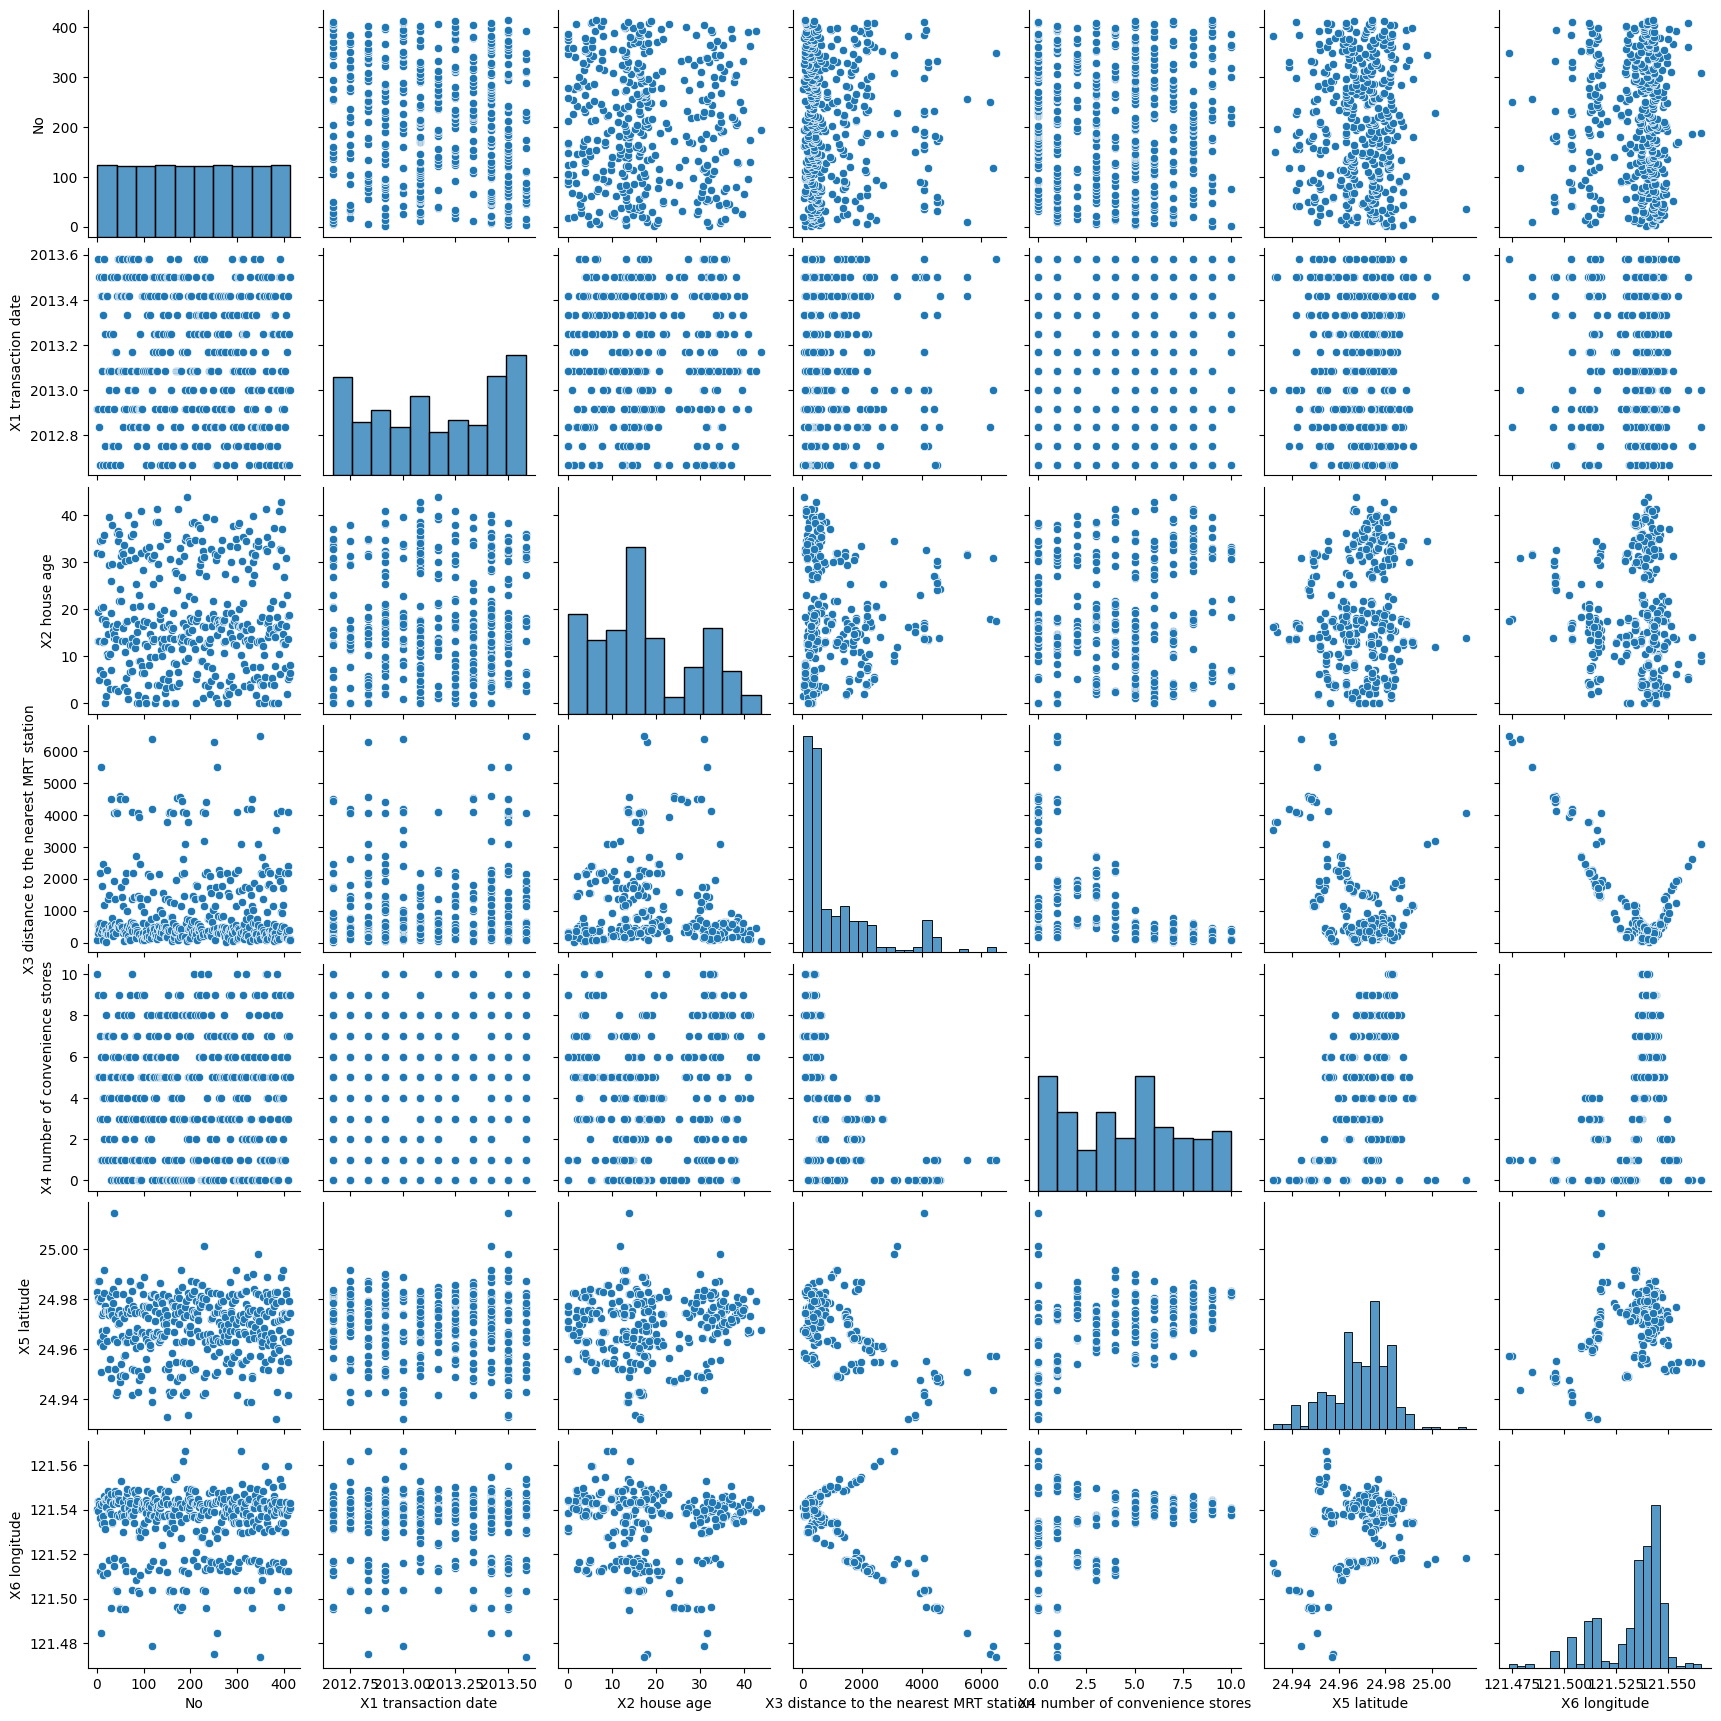

In [7]:
sns.pairplot(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)

pl.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [9]:
y_pr = pl.predict(X_test)

In [15]:
import joblib
joblib.dump(pl, '/content/drive/MyDrive/MACHINE_LEARNING/prediction1.pckl')

['/content/drive/MyDrive/MACHINE_LEARNING/prediction1.pckl']

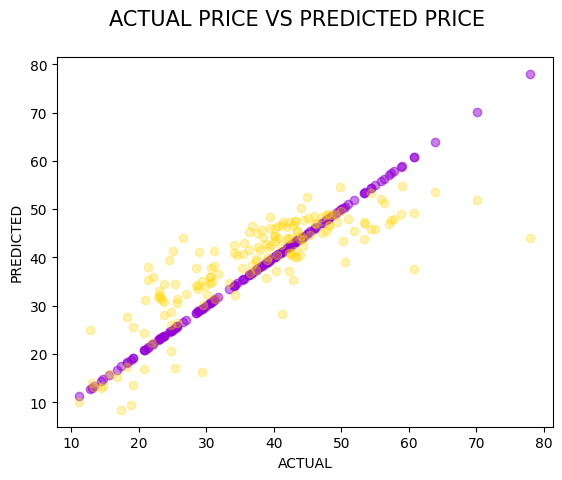

In [16]:
fgr = plt.figure()
plt.scatter(y_test, y_test, color ='darkviolet', alpha=0.5, label='Actual')
plt.scatter(y_test, y_pr, color ='gold', alpha=0.3, label='Predicted')
fgr.suptitle('ACTUAL PRICE VS PREDICTED PRICE', fontsize = 15)
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTED')
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
mean_a_e = mean_absolute_error(y_pr, y_test)
mean_sq_e = mean_squared_error(y_pr, y_test)
r_2 = r2_score(y_pr, y_test)
R_mse = sqrt(mean_sq_e)


In [12]:
print("MEAN ABSOLUTE ERROR = ", mean_a_e)
print("MEAN SQUARE ERROR = ", mean_sq_e)
print("ROOT SQAURED ERROR = ", r_2)
print("ROOT MEAN SQUARE ERROR = ", R_mse)

MEAN ABSOLUTE ERROR =  5.4224584418546335
MEAN SQUARE ERROR =  51.976049358567714
ROOT SQAURED ERROR =  0.5009198344820762
ROOT MEAN SQUARE ERROR =  7.2094416814735185


In [19]:
jobload = joblib.load('/content/drive/MyDrive/MACHINE_LEARNING/prediction1.pckl')
print(jobload.score(X_test, y_test))

0.6599383700391683
